<a href="https://colab.research.google.com/github/Rerzd/Ciencia_Datos_intro/blob/main/Bike_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels
!pip install wquantiles

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
bike = pd.read_csv('/content/BIKE DETAILS.csv')
bike.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [7]:
bike.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [24]:
bike.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [9]:
bike.sample(12)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
875,Hero Karizma ZMR,75000,2015,Individual,1st owner,11000,108000.0
1023,Bajaj Avenger 220 dtsi,45000,2012,Individual,1st owner,27000,95000.0
104,Royal Enfield Classic Desert Storm,150000,2017,Individual,1st owner,16500,181445.0
269,Bajaj Avenger Street 220,80000,2016,Individual,1st owner,7200,95955.0
817,Hero Karizma 2014,25000,2015,Individual,1st owner,40000,86744.0
827,Bajaj Pulsar 150,60000,2017,Individual,1st owner,28450,NaN
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0
441,Bajaj Discover 150S,35000,2015,Individual,1st owner,28000,63331.0
279,TVS Apache RTR 160,50000,2016,Individual,1st owner,40000,NaN


###Overview

In [16]:
bike.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [17]:
bike.info #no tiene datos null, es trabajable

<bound method DataFrame.info of                                      name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]>

In [18]:
bike.describe

<bound method NDFrame.describe of                                      name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]>

### Estimando precio de venta y kilometraje

In [19]:
bike["selling_price"].mean() #Precio promedio de todas las motocicletas listadas

59638.151743638075

In [13]:
bike["km_driven"].mean() #Promedio del kilometraje de cada moto

34359.83317624882

In [14]:
trim_mean(bike["selling_price"], 0.1) #promedio trimeado al 10%

50061.57714958775

In [15]:
trim_mean(bike["selling_price"], 0.1)
# al palicar la media trimeada, el valor diminuye en 9500 aprox. lo que implica una considerable cantidad de dispersión, pero no demasiada

50061.57714958775

In [20]:
np.average(bike["km_driven"], weights=bike["selling_price"])
# se implica que cada moto tiene un total de 23.991 km al ser vendida por el precio estándar

23991.645134964827

<Axes: >

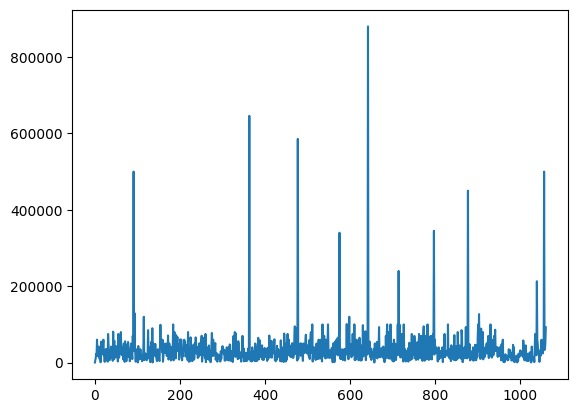

In [23]:
bike["km_driven"]. plot.line() #La siguiente grafica enumera las motos, ajustadas en el eje x, mientras que en el eje Y, se deja ver el kilometraje de cada moto listada

<Axes: >

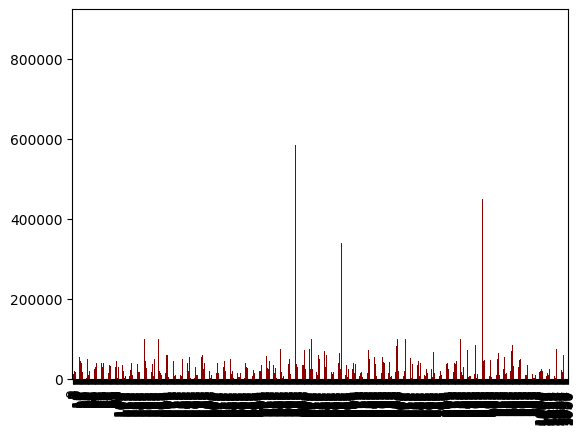

In [25]:
bike["km_driven"]. plot.bar(color = "darkred")

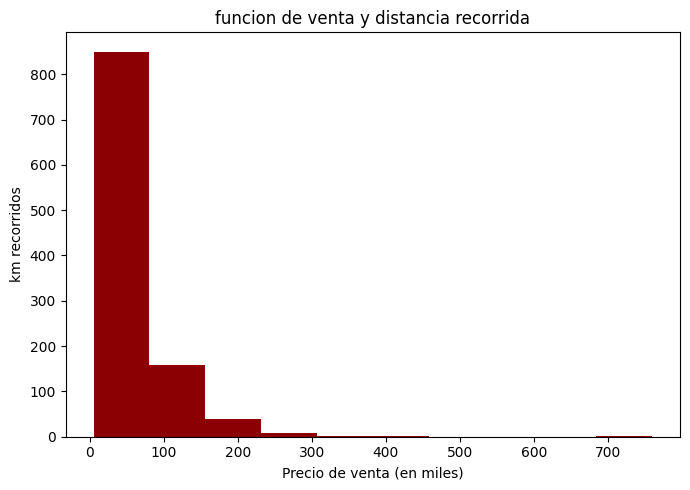

In [28]:
 ax = (bike.selling_price/1000).plot.hist(color = "darkred", figsize = (7,5))
 ax.set_xlabel("Precio de venta (en miles)")
 ax.set_ylabel("km recorridos")
 ax.set_title("funcion de venta y distancia recorrida")

plt.tight_layout()
plt.show()
#Se muestra la relación de ciertas motocicletas. Se relaciona el precio en función al kilometraje total de cada vehículo.}
# se observa que a mayor kilometraje (eje Y), el precio (eje x) es menor

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


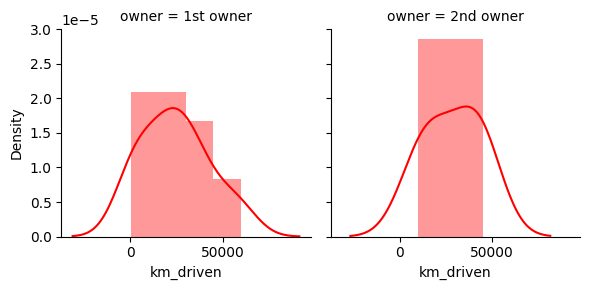

In [51]:
analisis = bike.head(20)
g = sns.FacetGrid(analisis, col="owner")
g.map(sns.distplot,"km_driven", color = "red") #Las siguientes dos graficas muestran el kilometraje de cada moto que fue realizado sea por su primer dueño o su segundo dueño